# Clustering Analysis (Gaming Detection) [Semi Supervised]

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import scipy.stats
from array import array
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing

In [2]:
#df= pd.read_csv("only_input.csv")
#normalized_df= preprocessing.scale(preprocessing.normalize(df))
#pd.DataFrame(normalized_df).to_csv("normal_input.csv")
df_norm= pd.read_csv("normal_input.csv")

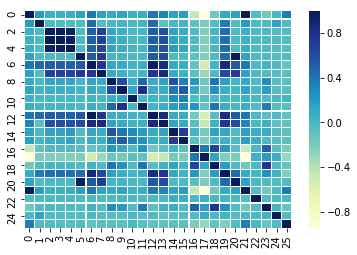

In [9]:
corrmat= df_norm.corr()
sns.heatmap(corrmat, cmap ="YlGnBu", linewidths = 0.1) 

In [17]:
#Function to divide clusters 
def makecluster(n, df):
    a=n
    s= df.shape
    size= round(s[0]/n)
    frames = [df.iloc[j*size:(j+1)*size].copy() for j in range(n+1)]
    
    #for i in range(n):
        #(frames[i]).to_excel("divdata" + str(a+1) + str(i) +".xlsx")
        
    a= []
    for i in range(n):
        list1=[]
        for j in range(0,26):
            list1.append(frames[i][df.columns[j]].mean())
        a.append(list1)
    a.append([0.155, -0.187, -0.115, -0.115, -0.0798, -0.0943, -0.107, -0.149, 0.00183, 0.00807, 0.21, -0.0623, -0.0964, -0.0112, -0.0806, -0.109, -0.169, -0.0798, -0.112, -0.168, -0.0943, 0.155, -0.0857, -0.134, -0.222, 0.154])
    return(a)

## KMeans 

In [18]:
def kmeansclus(n1, n2, file0, dfi, dfo):
    for i in range (n1, n2):
        cents= np.array(makecluster(i-1,file0))
        km = KMeans(n_clusters=i, init=cents, max_iter=1, n_init=1)
        seededlabel= km.fit_predict(dfi)
        dfo["K"+str(i)]= seededlabel

In [19]:
dfO= pd.read_excel("lables.xlsx")
file0= pd.read_csv("only_not_gaming.csv")
kmeansclus(2, 10, file0, df_norm, dfO)

In [20]:
dfO.to_excel("Knorm_labels.xlsx")

# GMM

In [21]:
def gmmclus(n1, n2, file0, dfi, dfo):
    for i in range (n1, n2):
        cents= np.array(makecluster(i-1,file0))
        gmm = GaussianMixture(n_components=i, means_init=cents)
        gmm.fit(dfi)
        seededlabel= gmm.predict(dfi)
        dfo["G"+str(i)]= seededlabel

In [22]:
gmmclus(2, 10, file0, df_norm, dfO)

In [23]:
dfO.to_excel("Gnorm_labels.xlsx")

# Heat-Maps

In [27]:
def heatmapplot(df, n1, n2):
    n2=n2+1
    for i in range(n1, n2):
        print("In Progress")
        a=[]
        for j in range(0, i):
            q= "SELECT avg(0), avg(1), avg(2), avg(3), avg(4), avg(5), avg(6), avg(7), avg(8), avg(9), avg(10), avg(11), avg(12), avg(13), avg(14), avg(15), avg(16), avg(17), avg(18), avg(19), avg(20), avg(21), avg(22),avg(23), avg(24), avg(25) FROM df WHERE K" + str(i) + "=" + str(j)
            que= sqldf(q)
            a.append(que.iloc[0].values)
            print("In Progress")
        sns.heatmap(a)
        plt.title("K"+str(i))
        plt.show()
        plt.savefig("K"+str(i)+".png")
        print("Saved: Plot for K"+str(i))

In [28]:
df_fulldata = pd.read_excel("full_datat.xlsx")

In Progress
In Progress
In Progress
In Progress


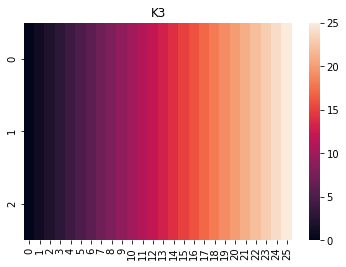

Saved: Plot for K3
In Progress
In Progress
In Progress
In Progress
In Progress


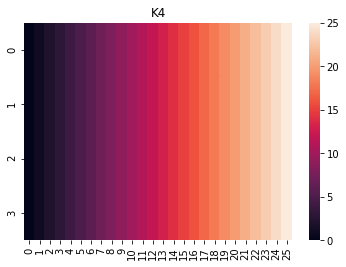

Saved: Plot for K4
In Progress
In Progress
In Progress
In Progress
In Progress
In Progress


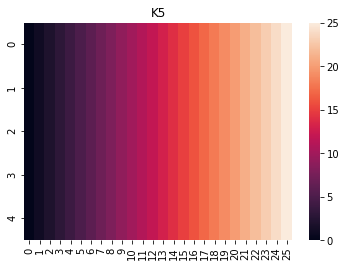

Saved: Plot for K5
In Progress
In Progress
In Progress
In Progress
In Progress
In Progress
In Progress


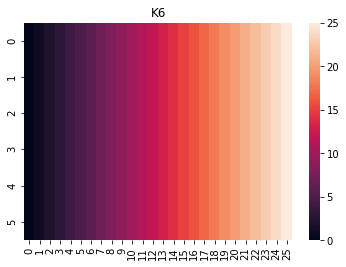

Saved: Plot for K6


<Figure size 432x288 with 0 Axes>

In [29]:
heatmapplot(df_fulldata, 3,6)

## Hiererchical Clustering 

In [7]:
import scipy
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
dfO= pd.read_excel("lables.xlsx")

In [6]:
for i in range(2, 10):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    label = cluster.fit_predict(df_norm)
    dfO["HA"+str(i)]= label
dfO.to_excel("HA.xlsx")

In [8]:
for i in range(2, 10):
    db_default = DBSCAN(eps = 0.0375, min_samples = i).fit(df_norm) 
    dfO["DB"+str(i)] = db_default.labels_ 
dfO.to_excel("DB.xlsx")